In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf
import numpy as np
import pandas as pd
import math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
InputDataset  = pd.read_csv('/content/gdrive/MyDrive/GAN_Regression/WprimeGenSamples/train_Gen_4TeV.csv',index_col=None ) 
TestDataset   = pd.read_csv('/content/gdrive/MyDrive/GAN_Regression/WprimeGenSamples/test_Gen_4TeV.csv',index_col=None )

In [ ]:
TestDataset.head()

,gentau_vis_px,gentau_vis_py,gentau_vis_pz,gentau_vis_e,gentau_vis_pt,neutrino_px,neutrino_py,neutrino_pz,neutrino_e,genmet,genmet_px,genmet_py,boson_mass
0,822.413100,457.550230,-941.308170,1331.082200,941.124600,-806.245300,-421.932980,3054.14620,3186.827400,26.238064,26.225977,26.225977,3993.23100
1,37.090450,1189.625200,675.895200,1368.729900,-1.000000,-25.638721,-1199.450200,-3056.56050,3283.580300,133.697000,104.987890,104.987890,3997.02300
2,-735.189640,1876.418600,-604.699500,2104.071000,2015.304100,729.990900,-1871.799200,-709.59814,2130.739000,1877.832600,-1749.580700,-1749.580700,4025.69100
3,15.535508,38.109413,-12.625603,43.084137,41.154335,-19.669594,-33.706245,-4.30183,39.262062,9.440048,-8.145935,-4.770561,80.36093
4,944.358340,1510.144200,600.327640,1879.559600,1781.108600,-942.020500,-1479.339600,-1330.58980,2201.435300,1157.640300,-974.017700,-974.017700,4015.00700


In [ ]:
InputDataset = InputDataset[InputDataset['gentau_vis_pt'] > 100]
InputDataset = InputDataset[InputDataset['boson_mass'] > 100]
TestDataset  = TestDataset[TestDataset['gentau_vis_pt'] > 100]
TestDataset  = TestDataset[TestDataset['boson_mass'] > 100]

In [ ]:
TestDataset.head()

,gentau_vis_px,gentau_vis_py,gentau_vis_pz,gentau_vis_e,gentau_vis_pt,neutrino_px,neutrino_py,neutrino_pz,neutrino_e,genmet,genmet_px,genmet_py,boson_mass
0,822.41310,457.55023,-941.30817,1331.0822,941.1246,-806.2453,-421.93298,3054.14620,3186.8274,26.238064,26.225977,26.225977,3993.2310
2,-735.18964,1876.41860,-604.69950,2104.0710,2015.3041,729.9909,-1871.79920,-709.59814,2130.7390,1877.832600,-1749.580700,-1749.580700,4025.6910
4,944.35834,1510.14420,600.32764,1879.5596,1781.1086,-942.0205,-1479.33960,-1330.58980,2201.4353,1157.640300,-974.017700,-974.017700,4015.0070
7,-924.70105,-1621.30930,-338.82004,1896.9761,1866.4716,906.5073,1618.58740,1110.44960,2162.1006,1754.427000,1529.084600,1529.084600,3985.0160
10,814.64624,-400.37787,-3113.31640,3242.9450,907.7174,-759.9698,307.07890,1002.30530,1294.7847,656.948360,235.307560,235.307560,4015.3364


In [ ]:
GenTauVis_trainDF = InputDataset.drop(
    [
     'gentau_vis_pt',
     'neutrino_px',
     'neutrino_py',
     'neutrino_pz',
     'neutrino_e',
     'genmet',
     'genmet_px',
     'genmet_py',
     'boson_mass'],axis=1)


Neutrino_trainDF = InputDataset.drop(
    [
     'gentau_vis_px',
     'gentau_vis_py',
     'gentau_vis_pz',
     'gentau_vis_e',
     'gentau_vis_pt',
     'genmet',
     'genmet_px',
     'genmet_py',
     'boson_mass'
    ],axis=1)

GenMET_trainDF = InputDataset.drop(
    [
     'gentau_vis_px',
     'gentau_vis_py',
     'gentau_vis_pz',
     'gentau_vis_e',
     'gentau_vis_pt',
     'neutrino_px',
     'neutrino_py',
     'neutrino_pz',
     'neutrino_e',
     'boson_mass',
     'genmet'],axis=1)

GenMET_trainDF['genmet_pz'] = 0
GenMET_trainDF['genmet_e']  = np.sqrt(GenMET_trainDF['genmet_px']**2 + GenMET_trainDF['genmet_py']**2)


GenTauVis_testDF = TestDataset.drop(
    [
     'gentau_vis_pt',
     'neutrino_px',
     'neutrino_py',
     'neutrino_pz',
     'neutrino_e',
     'genmet',
     'genmet_px',
     'genmet_py',
     'boson_mass'],axis=1)



GenMET_testDF = TestDataset.drop(
    [
     'gentau_vis_px',
     'gentau_vis_py',
     'gentau_vis_pz',
     'gentau_vis_e',
     'gentau_vis_pt',
     'neutrino_px',
     'neutrino_py',
     'neutrino_pz',
     'neutrino_e',
     'boson_mass',
     'genmet'],axis=1)

GenMET_testDF['genmet_pz'] = 0
GenMET_testDF['genmet_e']  = np.sqrt(GenMET_testDF['genmet_px']**2 + GenMET_testDF['genmet_py']**2)

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        8.440e+02, 3.527e+04]),
 array([ 100.1998 ,  302.6891 ,  505.17834,  707.6676 ,  910.1569 ,
        1112.6462 , 1315.1355 , 1517.6248 , 1720.114  , 1922.6033 ,
        2125.0925 , 2327.5818 , 2530.071  , 2732.5603 , 2935.0498 ,
        3137.539  , 3340.0283 , 3542.5176 , 3745.0068 , 3947.496  ,
        4149.9854 ], dtype=float32),
 <a list of 20 Patch objects>)

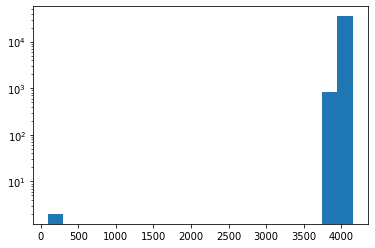

In [ ]:
p4 = Neutrino_trainDF.to_numpy(dtype='float32') + GenTauVis_trainDF.to_numpy(dtype='float32')
W_mass = np.sqrt(p4[:,3]**2 - (p4[:,2]**2 + p4[:,1]**2 + p4[:,0]**2))
plt.hist(W_mass,20,log=True)

In [ ]:
GenTau_p4 = GenTauVis_trainDF.to_numpy(dtype='float32')
Neutrino_p4 = Neutrino_trainDF.to_numpy(dtype='float32')

scale = np.amax(GenTau_p4) + np.amax(Neutrino_p4)

In [ ]:

def calcMT(tau_p4,met_p4):
  n   = tau_p4.shape[0]
  tauPT = np.sqrt(tau_p4['gentau_vis_px']**2 + tau_p4['gentau_vis_py']**2)
  tauET = tau_p4['gentau_vis_e']*tauPT/np.sqrt(tau_p4['gentau_vis_px']**2 + tau_p4['gentau_vis_py']**2 + tau_p4['gentau_vis_pz']**2)
  MET   = np.sqrt(met_p4['genmet_px']**2 + met_p4['genmet_py']**2)
  ScalarSumET = (tauPT + MET).to_numpy(dtype='float32')/scale
  VectorSumPx = (tau_p4['gentau_vis_px'] + met_p4['genmet_px']).to_numpy(dtype='float32')/scale
  VectorSumPy = (tau_p4['gentau_vis_py'] + met_p4['genmet_py']).to_numpy(dtype='float32')/scale

  MT = np.sqrt(ScalarSumET*ScalarSumET - VectorSumPx*VectorSumPx - VectorSumPy*VectorSumPy).reshape(n,1)
  return MT

def generate_real_sample(tau_p4,neutrino_p4,met_p4):
  n   = tau_p4.shape[0]
  _px = tau_p4['gentau_vis_px'] + neutrino_p4['neutrino_px']
  _py = tau_p4['gentau_vis_py'] + neutrino_p4['neutrino_py']
  _pz = tau_p4['gentau_vis_pz'] + neutrino_p4['neutrino_pz']
  _e  = (tau_p4['gentau_vis_e'] + neutrino_p4['neutrino_e']).to_numpy(dtype='float32')

  W_p3_sq  = (_px**2 + _py**2 + _pz**2).to_numpy(dtype='float32').reshape(n,1)/scale**2
  W_e_sq   = (_e**2).reshape(n,1)/scale**2
  X = np.hstack((W_p3_sq,W_e_sq))
  MT = calcMT(tau_p4,met_p4)
  
  return X,MT





## Checking the MT distribution

In [ ]:
_,mT = generate_real_sample(GenTauVis_trainDF,Neutrino_trainDF,GenMET_trainDF)

(array([1776., 2797., 3020., 3114., 3141., 2900., 2704., 2561., 2378.,
        2143., 1898., 1780., 1474., 1290., 1090.,  878.,  619.,  396.,
         151.,    6.]),
 array([4.3158372e-05, 2.2165563e-02, 4.4287968e-02, 6.6410378e-02,
        8.8532776e-02, 1.1065518e-01, 1.3277759e-01, 1.5490000e-01,
        1.7702240e-01, 1.9914481e-01, 2.2126721e-01, 2.4338962e-01,
        2.6551202e-01, 2.8763443e-01, 3.0975685e-01, 3.3187923e-01,
        3.5400164e-01, 3.7612405e-01, 3.9824647e-01, 4.2036885e-01,
        4.4249126e-01], dtype=float32),
 <a list of 20 Patch objects>)

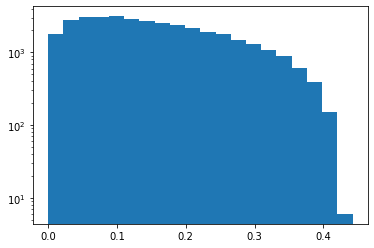

In [ ]:
plt.hist(mT,20,log=True)

In [ ]:
# custom GAN class

class GANregression(keras.Model):
    def __init__(self,ninputs,latent_dim):
        super(GANregression,self).__init__()
        self.discriminator = self.build_discriminator(ninputs)
        self.generator     = self.build_generator(latent_dim,ninputs)
        self.latent_dim = latent_dim
        self.gen_loss_tracker  = keras.metrics.Mean(name="generator_loss")
        self.disc_loss_tracker = keras.metrics.Mean(name="discriminator_loss")

    @property
    def metrics(self):
        return [self.gen_loss_tracker, self.disc_loss_tracker]
    
    def build_discriminator(self,n_inputs):
        dis_input = layers.Input((n_inputs))
        label_input = layers.Input((1,))
        merge_input = keras.layers.Concatenate()([dis_input,label_input])

        layer = layers.Dense(128,activation ='relu', kernel_initializer='he_uniform')(merge_input)
        layer = layers.Dense(64,activation  ='relu', kernel_initializer='he_uniform')(layer)
        layer = layers.Dense(32,activation  ='relu', kernel_initializer='he_uniform')(layer)
        
        out_layer = layers.Dense(1,activation='sigmoid')(layer)
        model = tf.keras.Model(merge_input,out_layer)
        return model

    # def build_generator(self,input_dim,n_outputs):
    #     input1 = tf.keras.layers.Input(shape=(input_dim,))
    #     x1  = tf.keras.layers.Dense(256, activation='relu' ,kernel_initializer='normal')(input1)
    #     #hx1 = tf.keras.layers.Dense(128, activation='relu' ,kernel_initializer='normal')(x1)
    #     input2 = tf.keras.layers.Input(shape=(input_dim,))
    #     x2  = tf.keras.layers.Dense(256, activation='relu' ,kernel_initializer='normal')(input2)
    #     #hx2 = tf.keras.layers.Dense(128, activation='relu' ,kernel_initializer='normal')(x2)
    #     added = tf.keras.layers.Add()([x1,x2])
    #     act = tf.keras.layers.Activation('linear')(added)
    #     out = tf.keras.layers.Dense(n_outputs)(act)
    #     model = tf.keras.models.Model(inputs=[input1, input2], outputs=out)
    #     return model

    def build_generator(self,input_dim,n_outputs):
        gen_input   = layers.Input((input_dim))
        label_input = layers.Input((1,))
        merge_input = keras.layers.Concatenate()([gen_input,label_input])
        layer = layers.Dense(128,activation='relu', kernel_initializer='he_uniform')(merge_input)
        hlayer= layers.Dense(64,activation='relu', kernel_initializer='he_uniform')(layer)
        layer = layers.Dense(32,activation='relu', kernel_initializer='he_uniform')(hlayer)
        out_layer = layers.Dense(n_outputs,activation='tanh')(layer)
        model = tf.keras.Model(merge_input,out_layer)
        return model


    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GANregression, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    def Eval(self,x):
        noise_vec = tf.random.normal(shape=tf.shape(x))
        predicted_variable = self.generator([noise_vec,x])
        return predicted_variable        

    def train_step(self,data):
        real_tau_p4,vis_mass = data
        batch_size = tf.shape(real_tau_p4)[0]

        fake_labels = tf.random.normal(shape=(batch_size,1),mean=0.107)
        random_latent_vector = tf.random.normal(shape=(batch_size,self.latent_dim))
        random_vector_labels = tf.concat([random_latent_vector,vis_mass],axis=1)

        generated_taup4 = self.generator(random_vector_labels)

        fake_taup4_labels = tf.concat([generated_taup4,fake_labels],-1)
        real_taup4_labels = tf.concat([real_tau_p4,fake_labels],-1)
  
        combined_variable = tf.concat([fake_taup4_labels,real_taup4_labels],axis=0)
        labels = tf.concat(
            [tf.ones((batch_size,1)), tf.zeros((batch_size,1))], axis=0
        )
        #labels += 0.05 * tf.random.normal(tf.shape(labels),stddev=5.0)
        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_variable)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )
        random_latent_vectors = tf.random.normal(shape=(batch_size,self.latent_dim))
        random_vector_labels = tf.concat([random_latent_vector,vis_mass],axis=1)
        # Assemble labels that say "all real images"
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            generated_taup4 = self.generator(random_vector_labels)
            fake_taup4_labels = tf.concat([generated_taup4,fake_labels],-1)
            predictions = self.discriminator(fake_taup4_labels)
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))
        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
        }


class GANMonitor(keras.callbacks.Callback):
    def __init__(self,real_tau_p4,vis_mass,latent_dim,prefix,incriment):
        self.latent_dim = latent_dim
        self.real_tau_p4 = real_tau_p4
        self.incriment = incriment
        self.prefix = prefix
        self.vis_mass = vis_mass



    def summarise_performance(self,real_tau_p4,fake_tau_p4):
        real_boson_mass = (-real_tau_p4[:,0] + real_tau_p4[:,1])*scale**2
        fake_boson_mass = (-fake_tau_p4[:,0] + fake_tau_p4[:,1])*scale**2
        fig,ax = plt.subplots()
        ax.hist(real_boson_mass,20,color='blue',label='real')
        ax.hist(fake_boson_mass,20,color='red',alpha=0.5,label='fake')
        # ax.scatter(real_tau_p4[:,0],real_tau_p4[:,1],color='blue',label='real')
        # ax.scatter(fake_tau_p4[:,0],fake_tau_p4[:,1],color='red',label='fake')
        ax.legend()
        

    # def SaveModels(self,epoch):
    #     discriminator = self.model.discriminator
    #     generator = self.model.generator
    #     discriminator.trainable = True
    #     dir_path = '/content/gdrive/MyDrive/GAN_Models/'
    #     tf.keras.models.save_model(generator,dir_path+'generator_'+self.prefix+'_'+str(epoch))
    #     tf.keras.models.save_model(discriminator,dir_path+'discriminator_'+self.prefix+'_'+str(epoch))
        
    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal(shape=(tf.shape(self.real_tau_p4)[0],self.latent_dim))
        generated_taup4_labels = tf.concat([random_latent_vectors,self.vis_mass],-1)
        self.fake_tau_p4 = self.model.generator(generated_taup4_labels)
        # if epoch % 1000==0:
        #   print('='*15,epoch,'='*15)
        # if epoch % self.incriment == 0 and epoch != 0:
        self.summarise_performance(self.real_tau_p4,self.fake_tau_p4)

In [ ]:
ninputs,noutput = 2,2
latent_dim = 2

In [ ]:
# preparing Training and Real dataset
real_samples,MT = generate_real_sample(GenTauVis_trainDF,Neutrino_trainDF,GenMET_trainDF)

real_samples.shape
#vis_mass.shape

(36116, 2)

In [ ]:
gan = GANregression(ninputs=ninputs,latent_dim=latent_dim)

gan.compile(
    d_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
    g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
    loss_fn=keras.losses.BinaryCrossentropy(from_logits=False),
)

In [ ]:
es = EarlyStopping(monitor='d_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)
gan.fit(real_samples,MT,epochs=100,callbacks=[GANMonitor(real_samples,MT,latent_dim,'Wprime',1000),es],verbose=True)

In [ ]:
test_mT = calcMT(GenTauVis_testDF,GenMET_testDF)
N = test_mT.shape[0]

random_latent_vectors = tf.random.normal(shape=(N,latent_dim))
generated_taup4_labels = tf.concat([random_latent_vectors,test_mT],-1)

Wprime_inv_mass = gan.generator(generated_taup4_labels)

In [ ]:
regression_variables = TestDataset.drop(['gentau_vis_pt',
     'neutrino_px',
     'neutrino_py',
     'neutrino_pz',
     'neutrino_e',
     'genmet','boson_mass'],axis=1)
model = keras.models.load_model('/content/gdrive/MyDrive/GAN_Regression/model4TeV.h5')
regression_Wmass = model.predict(regression_variables)


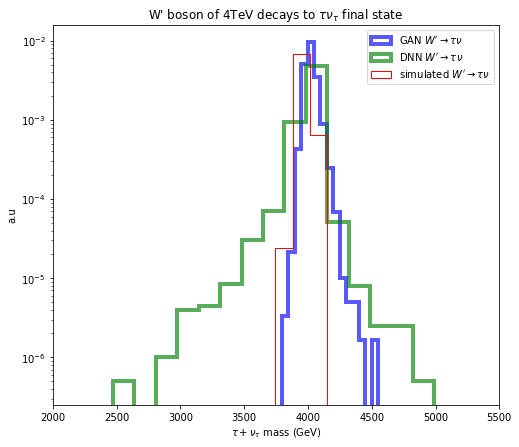

In [ ]:
ganW_mass_sq = Wprime_inv_mass[:,1]-Wprime_inv_mass[:,0]
ganW_mass = np.sqrt(ganW_mass_sq)*scale
plt.subplots(figsize=(8,7))
plt.title(r"W' boson of 4TeV decays to $\tau\nu_{\tau}$ final state")
plt.hist(ganW_mass,15,color='blue',alpha=0.65,density=True,log=True,histtype='step',linewidth=4,label=r"GAN $W'\rightarrow\tau\nu$")
plt.hist(regression_Wmass,15,color='green',alpha=0.65,density=True,log=False,histtype='step',linewidth=4,label=r"DNN $W'\rightarrow\tau\nu$")
plt.hist(InputDataset['boson_mass'],30,color='r',density=True,histtype='step',label=r"simulated $W'\rightarrow\tau\nu$")
plt.xlim((2000,5500))
plt.xlabel(r'$\tau + \nu_{\tau}$ mass (GeV)')
plt.ylabel('a.u')
plt.legend()
plt.savefig('/content/gdrive/MyDrive/GAN_Regression/MWprime4TeV.pdf')

In [ ]:
ganW_mass.std()/4000


0.011462112426757813

In [ ]:
regression_Wmass.std()/4000

0.01994313049316406